# SPARKS FOUNDATION PROJECT DEC. 2022

# Task 2 Problem Statement
Predict the optimum number of clusters and represent it visually from Iris dataset

In [1]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Datasets\Iris.csv')

In [3]:
#checking the first five rows
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the last five rows
df.tail()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#check total numbers of rows and columns
df.shape

(150, 5)

In [6]:
#checking general information on the set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sepal Length (cm)  150 non-null    float64
 1   Sepal Width (cm)   150 non-null    float64
 2   Petal Length (cm)  150 non-null    float64
 3   Petal Width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#obviously we don't need the column 'Species' so lets drop it
df.drop(['Species'], inplace = True, axis = 1)

In [8]:
df.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#performing general statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal Length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal Length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal Width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
#checking the numbers of columns
df.columns

Index(['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)',
       'Petal Width (cm)'],
      dtype='object')

In [11]:
#checking for null values
df.isnull().sum()

Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
dtype: int64

In [12]:
#scout for duplicates and drop them if any is found
df.duplicated().sum()

3

In [13]:
#drop them now
df.drop_duplicates(inplace = True)

In [14]:
#Checking if there is still duplicates
df.duplicated().sum()

0

Obviously no more dupicates, they have all been fixed.

# IMPORTING MODULES NEEDED FOR K-MEANS CLUSTERING

In [15]:
from sklearn.cluster import KMeans

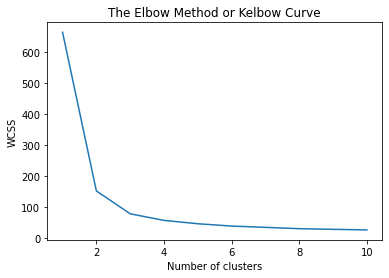

In [16]:
#Finding the optimum number of clusters for k-means classification
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  
#Plotting the results onto a line graph helps us to observe 'The elbow
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method or Kelbow Curve')
plt.xlabel('Number of clusters')
#Within cluster sum of squares
plt.ylabel('WCSS')
plt.show()

In [25]:
#finding the elbow point
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), wcss, curve = 'convex', direction ='decreasing'
                )
kl.elbow

3

The elbow is at exactly between 2 and 4 which is 3, that is 3 numbers of clusters.
therefore K=3

In [26]:
#applying kmeans to the dataset or Creating the kmeans class using optimal numbers of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

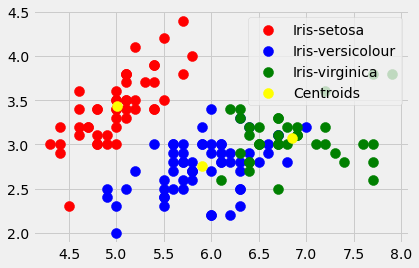

In [27]:
#visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()